In [1]:
# Import Memspectrum
from memspectrum import MESA

import numpy as np

np.random.seed(0)

import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
# Making dataset from the 3 pedestrians movments 

# Pedestrian 0
person_0_X = [767, 752, 746, 716, 717, 711]

person_0_Y = [1243, 1217, 1188, 1148, 1126, 1101]

# Pedestrian 1
person_1_X = [803, 776, 767, 759, 742, 741]

person_1_Y = [1368, 1324, 1295, 1266, 1235, 1217]

# Pedestrian 2
person_2_X = [782, 774, 789, 766, 760, 753]

person_2_Y = [1452, 1422, 1367, 1332, 1305, 1271]

In [3]:
# Instantiate an Instance of MESA
m = MESA()

# Run Memspectrum on Person 0 X and Y
m.solve(person_0_X)

forecast = m.forecast(person_0_X, length = 1, number_of_simulations = 10, include_data = False)

print(forecast)

ValueError: could not broadcast input array from shape (6,) into shape (10,0)

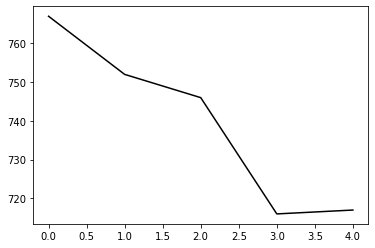

In [40]:
N, dt = 6, 1  # Number of samples and sampling interval
no_pred = 2
time = np.arange(0, N) * dt
data = [24, 27, 31, 36, 42, 49, 57, 66, 76, 87]
plt.plot(time[:-1], person_0_X[:-1], color = 'k')
plt.show()

In [41]:
M = MESA()
M.solve(person_0_X[:-no_pred])
forecast = M.forecast(person_0_X[:-no_pred], length = no_pred, number_of_simulations = no_pred*100, 
include_data = False)
median = np.median(forecast, axis = 0) # Ensemble median

IndexError: index 4 is out of bounds for axis 0 with size 4

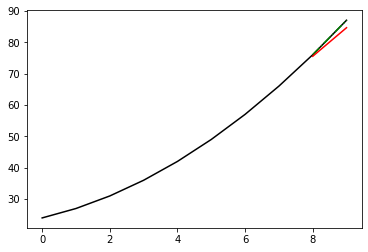

In [21]:
plt.plot(time, data, color = 'k')
plt.plot(time[N-no_pred:], data[N-no_pred:], color = 'g', linestyle = '-.', label = 'Observed data')
plt.plot(time[N-no_pred:], median, color = 'r', label = 'median estimate')
plt.show()

In [22]:
# Sum Squared Error just as a quick evaluation
real_values = data[N-no_pred:]
print("Real Values = ", real_values)
print("Median Values = ", median)
SSE = np.sum((real_values - median)**2)
print("SSE = ", SSE)

Real Values =  [76, 87]
Median Values =  [75.51168173 84.6201481 ]
SSE =  5.902149787646119
